# Project 2: Exploratory Data Analysis (EDA)

This notebook showcases an in-depth exploratory data analysis (EDA) process using a cleaned dataset from Project 1.

The goal of this project is to uncover patterns, correlations, and insights that can drive data-driven decisions, further analyses, and business strategies.

## Step 1: Importing Required Libraries

We'll import the essential libraries required for data manipulation, visualization, and analysis.

In [2]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Step 2: Load the Cleaned Dataset

Load the cleaned dataset from Project 1 to proceed with the exploratory analysis.

In [5]:
# Load the cleaned dataset
file_path = "Cleaned_Dataset_Shopping_Trends.csv"  # Replace with the actual path
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"File not found at {file_path}. Please verify the file path.")
    raise

Dataset loaded successfully!


In [5]:
# Quick Overview of the Dataset
print("\n--- Dataset Overview ---")
print(data.info())

print("\n--- Statistical Summary ---")
print(data.describe())


--- Dataset Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-nu

## Step 3: Data Distribution Analysis

We'll analyze the distribution of numerical variables to understand data trends and detect potential anomalies.

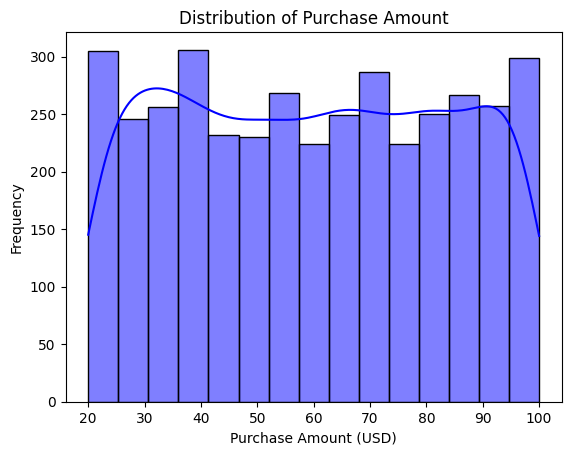

In [8]:
# Example: Distribution of Purchase Amount
def plot_distribution(column, title, xlabel):
    sns.histplot(data[column], kde=True, color="blue")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.show()

plot_distribution("Purchase Amount (USD)", "Distribution of Purchase Amount", "Purchase Amount (USD)")

## Step 4: Correlations Between Variables

We'll analyze the relationships among numeric variables to identify key patterns and dependencies.

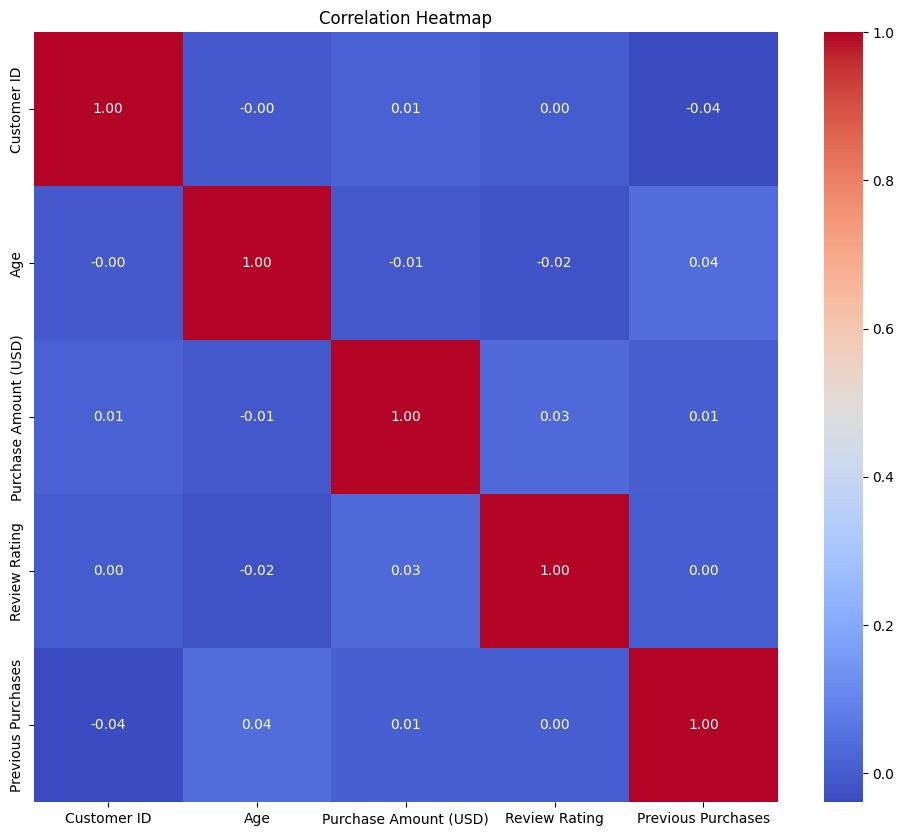

In [11]:
# Selecting numerical features for correlation analysis
numerical_data = data.select_dtypes(include=["int64", "float64"])

# Heatmap for correlation analysis
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Step 5: Exploring Relationships Between Features

Next, we'll explore relationships between different features using various visualization techniques, such as boxplots and scatter plots.

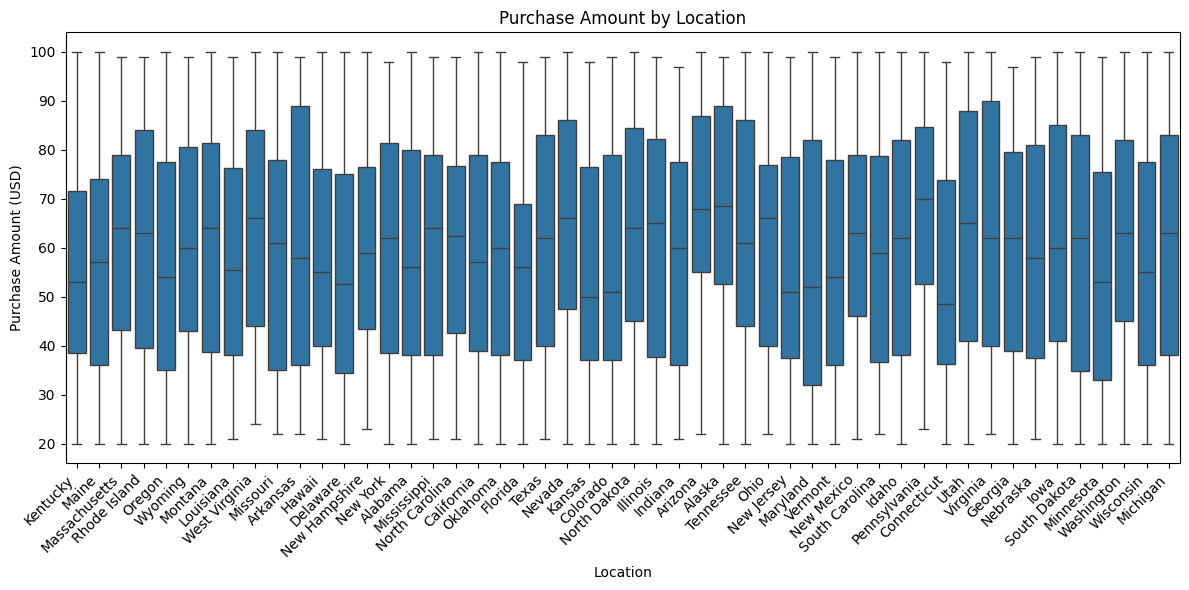

In [16]:
# Boxplot: Purchase Amount by Location
plt.figure(figsize=(12, 6))  
sns.boxplot(x='Location', y='Purchase Amount (USD)', data=data)
plt.title('Purchase Amount by Location')
plt.xlabel('Location')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

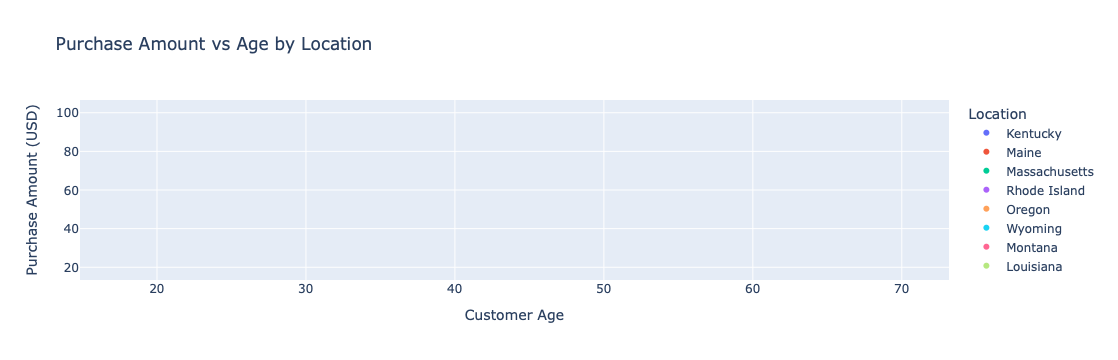

In [18]:
# Scatter Plot: Age vs. Purchase Amount
fig = px.scatter(
    data, x="Age", y="Purchase Amount (USD)", color="Location",
    title="Purchase Amount vs Age by Location",
    labels={"Age": "Customer Age", "Purchase Amount (USD)": "Purchase Amount (USD)"}
)
fig.show()

## Step 6: Category Analysis

We will analyze the distribution of categorical data to identify important trends.

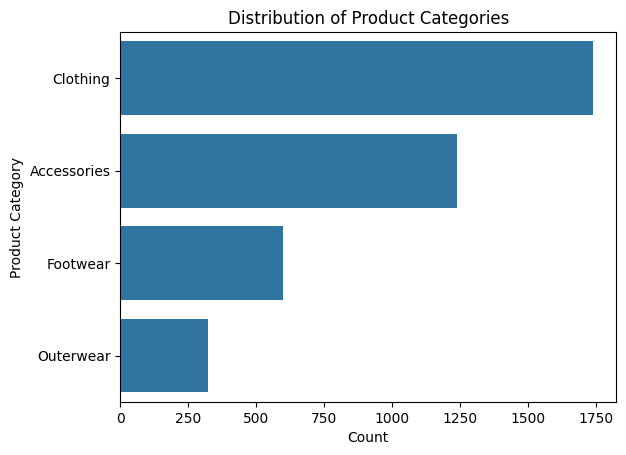

In [21]:
# Count plot: Product Categories
sns.countplot(y='Category', data=data, 
              order=data['Category'].value_counts().index)
plt.title('Distribution of Product Categories')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

## Step 7: Temporal Analysis

If the dataset includes time-based information, such as the "Season" column, we can explore seasonal trends.

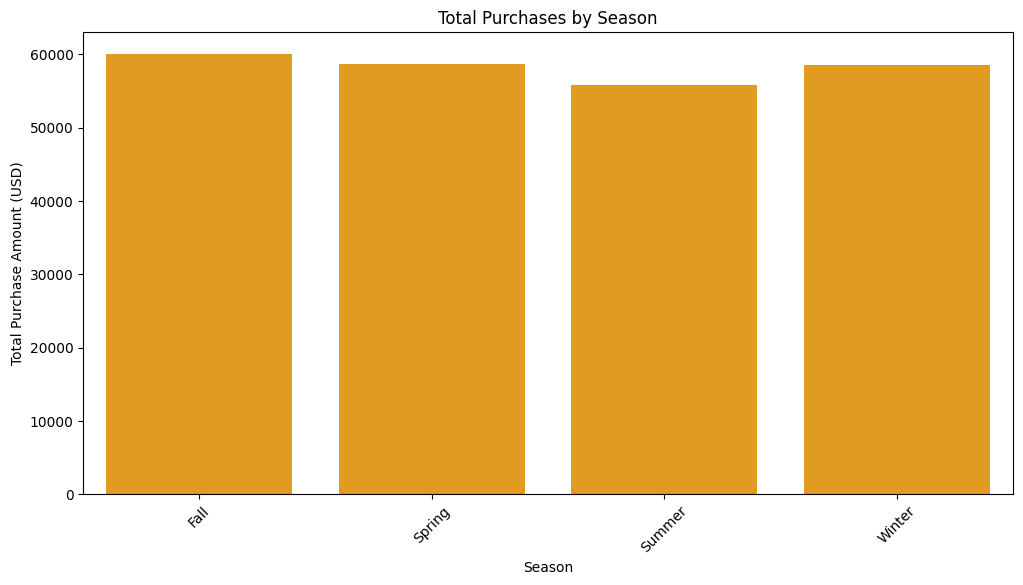

In [24]:
# Temporal Analysis using the 'Season' column
if "Season" in data.columns:
    season_trends = data.groupby("Season")["Purchase Amount (USD)"].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=season_trends, x="Season", y="Purchase Amount (USD)", color="orange")
    plt.title("Total Purchases by Season")
    plt.xlabel("Season")
    plt.ylabel("Total Purchase Amount (USD)")
    plt.xticks(rotation=45)
    plt.show()


## Insights and Recommendations

Key Insights:

High-spending regions and customer segments have been identified.
Popular product categories contributing to sales have been highlighted.
Relationships between customer age and spending patterns have been explored.
Temporal trends for seasonality have been analyzed

#### Next Steps:

1. Perform customer segmentation to identify target groups.
2. Use findings to design predictive models for forecasting.
3. Leverage insights for marketing campaigns and strategic planning.

## Conclusion

In this project, we performed an in-depth exploratory data analysis (EDA) on an e-commerce dataset to uncover key patterns and insights.

- We visualized various aspects of the dataset, such as the distribution of purchase amounts, customer demographics, and seasonal trends.
- We analyzed the correlations between different variables to identify important relationships, such as how customer age influences purchase behavior.
- We explored categorical data, revealing the most popular product categories and the regions with the highest spending.

### Key Insights:

1. High-Spending Regions: Certain regions exhibit significantly higher spending behavior, which could be leveraged for targeted marketing campaigns.
2. Customer Segments: Demographic factors such as age influence spending patterns, with certain age groups spending more on specific categories.
3. Product Categories: Some product categories dominate sales, which could guide inventory management and promotional strategies.
4. Seasonal Trends: Temporal analysis revealed that certain seasons drive higher sales, suggesting potential seasonal marketing efforts.

### Next Steps:

- Customer Segmentation: Perform deeper customer segmentation using clustering techniques to better understand distinct customer groups.
- Predictive Modeling: Leverage insights from the analysis to build predictive models for forecasting future sales.
- Marketing Strategies: Use findings to inform targeted marketing campaigns, especially in high-spending regions or for specific customer segments.
- Seasonal Analysis: Incorporate time-series forecasting to better plan for seasonal sales trends and optimize inventory management.